<img src='logo_ucm.png' width='200'/>

# <center>PROYECTO MACHINE LEARNING AIRBNB</center>

**PARTICIPANTES:**


BRYAM DAVID CHAMBA JARAMILLO

ALVAR YEBEL DE BLAS FERNÁNDEZ

MARÍA GARCÍA RODRIGUEZ

MANUEL GRAU ROLDÁN

ÁLVARO MARTÍN LÓPEZ

LUIS JAVIER NATES ARECHAVALETA

In [741]:
#import funciones_auxiliares 
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import datetime

#Estadística
from scipy import stats
from scipy.stats import norm
import inspect

#Aprendizaje automático
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce

# 1. Importar los datos.

Los importamos mediante read_csv de pandas

In [742]:
data = pd.read_csv('airbnb-listings-extract.csv', sep=';', error_bad_lines=False)

In [743]:
data.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.478000e+04,1.478000e+04,1.478000e+04,12881.000000,14777.000000,14777.000000,14780.000000,14780.000000,14780.000000,14725.000000,...,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,1.028089e+07,2.017037e+13,3.608080e+07,94.823461,12.513636,12.513636,40.497626,-3.858041,3.277808,1.281732,...,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,5.564829e+06,5.667971e+08,3.425360e+07,15.215988,34.090223,34.090223,4.641387,14.123146,2.097291,0.658517,...,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.554732e+06,2.017041e+13,6.787360e+06,100.000000,1.000000,1.000000,40.409726,-3.707604,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.133492e+07,2.017041e+13,2.464875e+07,100.000000,2.000000,2.000000,40.419466,-3.700785,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.532631e+07,2.017041e+13,5.432919e+07,100.000000,6.000000,6.000000,40.430916,-3.684057,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [744]:
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


Tenemos tantas variables que no nos salen todas en la tabla, antes de nada arreglaremos algunas variables para poder analizarlas mejor luego.

# 2. Transformacion y eliminación de los datos.

## A) Selección de variables

Antes de eliminar nada primero veremos que variables son categoricas viendo cuánto se repiten y que tipo de variables son.

In [745]:
for i in data.columns:
    n = len(pd.unique(data[i]))
    print("No.of.unique values of '"+i+"':", n)

No.of.unique values of 'ID': 14780
No.of.unique values of 'Listing Url': 14780
No.of.unique values of 'Scrape ID': 38
No.of.unique values of 'Last Scraped': 37
No.of.unique values of 'Name': 14376
No.of.unique values of 'Summary': 13290
No.of.unique values of 'Space': 10175
No.of.unique values of 'Description': 14282
No.of.unique values of 'Experiences Offered': 5
No.of.unique values of 'Neighborhood Overview': 7913
No.of.unique values of 'Notes': 4653
No.of.unique values of 'Transit': 7840
No.of.unique values of 'Access': 7129
No.of.unique values of 'Interaction': 6586
No.of.unique values of 'House Rules': 8031
No.of.unique values of 'Thumbnail Url': 11958
No.of.unique values of 'Medium Url': 11958
No.of.unique values of 'Picture Url': 14758
No.of.unique values of 'XL Picture Url': 11958
No.of.unique values of 'Host ID': 8935
No.of.unique values of 'Host URL': 8935
No.of.unique values of 'Host Name': 3277
No.of.unique values of 'Host Since': 2117
No.of.unique values of 'Host Location'

In [746]:
data.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                     

La variable regresora que queremos obtener será el precio.

In [747]:
y = data['Price']

Escogemos las variables con las que nos quedamos, algunas variables las eliminamos por ser muy parecidas, otras por no aportar información del problema y otras como 'Monthly Price' por ser hasta cierto punto lo que queremos obtener.

In [748]:
data=data[['Host Since','Host Response Rate','Host Acceptance Rate',
            'Host Listings Count','Host Total Listings Count',
            'Host Verifications','Market','Property Type','Room Type',
            'Accommodates','Bathrooms','Bedrooms','Beds','Bed Type',
            'Amenities','Square Feet',
            'Cleaning Fee','Guests Included','Extra People','Minimum Nights',
            'Maximum Nights','Availability 365','Number of Reviews',
            'Review Scores Rating','License','Cancellation Policy',
             'Calculated host listings count','Reviews per Month','Geolocation',
             'Features','Latitude','Longitude']
            ]

In [749]:
data.shape

(14780, 32)

In [750]:
data.head()

,Host Since,Host Response Rate,Host Acceptance Rate,Host Listings Count,Host Total Listings Count,Host Verifications,Market,Property Type,Room Type,Accommodates,...,Number of Reviews,Review Scores Rating,License,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features,Latitude,Longitude
0,2016-02-11,100.0,NaN,1.0,1.0,"email,phone,reviews,kba",Austin,Loft,Entire home/apt,2,...,42,98.0,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id...",30.337361,-97.863277
1,2016-11-08,100.0,NaN,162.0,162.0,"email,phone,reviews,work_email",Barcelona,Apartment,Entire home/apt,4,...,1,80.0,HUTB-006721,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ...",41.389683,2.172625
2,2016-11-08,100.0,NaN,162.0,162.0,"email,phone,reviews,work_email",Barcelona,Apartment,Entire home/apt,4,...,0,NaN,HUTB-007527,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ...",41.393035,2.162173
3,2010-05-25,100.0,NaN,27.0,27.0,"email,phone,facebook,reviews,manual_offline,ju...",Barcelona,Apartment,Entire home/apt,8,...,13,92.0,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re...",41.396967,2.167418
4,2016-01-12,99.0,NaN,207.0,207.0,"email,phone,reviews,jumio",Barcelona,Apartment,Entire home/apt,5,...,0,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is...",41.388685,2.155150


Hemos quitado bastante paja, algunas variables las hemos eliminado por ser sumas de otras, por ser muy parecido a otras etc.

## B) Matriz de correlación en variables continuas.

In [751]:
list_var_continuous = list(data.select_dtypes('float').columns)+list(data.select_dtypes('int').columns)

Hagamos la matriz de correlación para ver si algunas variables aportan información similar a nuestro modelo de regresión, lo que permitiría eliminar algunas variables

In [752]:
funciones_auxiliares.get_corr_matrix(dataset = data[list_var_continuous], metodo='spearman', size_figure=[10,8])

NameError: name 'funciones_auxiliares' is not defined

Con un simple análisis cualitativo parece claro que 3 variables (las relacionadas tienen una correlaión perfecta por lo que podemos prescindir e dos de ellas y simplificar algo el modelo

In [753]:
data = data.drop(['Host Total Listings Count', 'Host Listings Count'], axis = 1)

In [754]:
data.columns

Index(['Host Since', 'Host Response Rate', 'Host Acceptance Rate',
       'Host Verifications', 'Market', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Amenities', 'Square Feet', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 365',
       'Number of Reviews', 'Review Scores Rating', 'License',
       'Cancellation Policy', 'Calculated host listings count',
       'Reviews per Month', 'Geolocation', 'Features', 'Latitude',
       'Longitude'],
      dtype='object')

# 3.Transformación de variables.

### 3.1. Cancellation Policy.
Utilizaremos los cuantiles para poder distibuir los valores en cuatro categorías

Póliza de cancelación

In [755]:
data['Cancellation Policy'].value_counts()

strict             5742
flexible           4671
moderate           4248
strict_new           34
super_strict_60      32
moderate_new         20
super_strict_30      19
flexible_new         14
Name: Cancellation Policy, dtype: int64

In [756]:
data['Cancellation Policy'] = data['Cancellation Policy'].replace({'strict': 0.25, 'flexible':0.9, 'moderate': 0.5,
                                                                   'strict_new': 0.25, 'super_strict_60':0, 'super_strict_30':0,
                                                                  'moderate_new':0.5, 'flexible_new': 0.9}).astype('float')

Al estandarizar los datos con la división del X_train y X_test servirán para mejorar el algoritmo

### 3.3. Host Since.
El siguiente paso será transformar la fecha desde la que el dueño del airbnb ofrece un alojamiento en días desde esa fecha

In [757]:
fecha = pd.to_datetime(data['Host Since'])
#Creamos una variable que reste la maxima fecha de nuestra base de datos a la fecha del anfitrión 
tiempo_anfitrión = (max(fecha) - fecha).astype('timedelta64[D]')
#Sustituimos por la variable fecha para que sea más sencillo utilizarla a la hora de los modelos 
data['Host Since'] = tiempo_anfitrión
data['Host Since'] = data['Host Since'].fillna(0)

### 3.4. Amenities, Features, Host Verifications y License.

Estas variables que vienen en formato string que sin embargo se pueden transformar a una ristra de variables binarias , las transformaremos y posteriormente haremos PCA parea reducirlas.

In [758]:
def str_to_dataframe(data,column):
    datos=[]
    for i in data[column]:
        if type(i)== float:#si es np.nan creamos un diccionario vacio
            lista={}
        else:#en caso contrario creamos un diccionario con los datos
            aux =i.split(',')
            lista={}
            for j in aux:
                lista[j]=True
        datos.append(lista)#añadimos el diccionario creada a la lista
    return(pd.DataFrame(datos).fillna(False))#transformamos la list en dataframe 
    

Dado que todas las variables que nos saldrán son dicotómicas usaremos Pca para tranformar la variables(Probamos a usar clustering gerárquico con la distancia de Manhattan pero tardaba demasiado), de tal forma que obtendremos varias variables continuas.

In [759]:
def str_to_continuous(data, columns,N_components):
    '''
    El siguiente código 
    data: dataframe a usar 
    columns: columnar que se quieren transformar 
    n_components:lista con numero de componentes que se quieren obtener por fila 
    
    '''
    from sklearn.decomposition import PCA
    X_transK=pd.DataFrame()
    for i,column in enumerate(columns):
        datos=str_to_dataframe(data,column)
        if column=='Host Verifications':#Contaremos License como parte de host verification
            datos['License']=data['License'].isna()           
        pca = PCA(n_components=N_components[i])
        pca.fit(datos)
        print(pca.explained_variance_ratio_.sum())
        labels=[]
        for i in range(N_components[i]):
            labels.append(column+'_'+str(i))
        data= data.join(pd.DataFrame(pca.transform(datos),columns=labels))
    return data

Tras algunas pruebas decidimos usar 12 componentes para Amenities,
3 para  Features y 3 para Host verifications

In [760]:
columns=['Amenities','Features','Host Verifications']
N_components=[12,3,3]
data=str_to_continuous(data, columns,N_components)

0.6297827393519647
0.7710154876416764
0.6157291122887821


In [761]:
data=data.drop(['Amenities','Features','Host Verifications','License'],axis=1)

In [762]:
data

,Host Since,Host Response Rate,Host Acceptance Rate,Market,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,...,Amenities_8,Amenities_9,Amenities_10,Amenities_11,Features_0,Features_1,Features_2,Host Verifications_0,Host Verifications_1,Host Verifications_2
0,421.0,100.0,NaN,Austin,Loft,Entire home/apt,2,1.0,1.0,1.0,...,-0.481565,0.242706,0.560399,0.102890,-0.441616,-0.630208,-0.066578,-0.619940,-0.101797,0.106469
1,150.0,100.0,NaN,Barcelona,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,0.329049,0.015574,0.887026,0.681351,0.531915,0.912232,0.267454,-0.541394,-0.128328,-0.093625
2,150.0,100.0,NaN,Barcelona,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,0.329049,0.015574,0.887026,0.681351,0.531915,0.912232,0.267454,-0.541394,-0.128328,-0.093625
3,2509.0,100.0,NaN,Barcelona,Apartment,Entire home/apt,8,2.0,3.0,4.0,...,-0.736711,0.523013,0.128877,-0.036693,-0.258650,0.582044,0.767222,0.408022,0.634086,-0.754867
4,451.0,99.0,NaN,Barcelona,Apartment,Entire home/apt,5,1.0,2.0,2.0,...,0.016091,0.235966,-0.080284,-0.076036,-0.717360,0.388629,-0.098217,0.218679,-0.313825,-0.301971
5,451.0,99.0,NaN,Barcelona,Apartment,Entire home/apt,6,1.0,2.0,3.0,...,-0.219592,0.381011,-0.162087,-0.117387,-0.717360,0.388629,-0.098217,0.218679,-0.313825,-0.301971
6,1385.0,100.0,NaN,Barcelona,Apartment,Entire home/apt,5,2.0,3.0,4.0,...,-0.563754,0.496835,0.117894,-0.202819,0.073205,0.718818,-0.597985,-0.595788,-0.123103,0.070228
7,1737.0,100.0,NaN,Barcelona,Apartment,Private room,2,1.0,1.0,1.0,...,0.718080,0.025350,0.327413,0.086875,0.462200,-0.201356,-0.596440,-0.476201,0.850579,-0.102803
8,451.0,99.0,NaN,Barcelona,Apartment,Entire home/apt,6,2.0,2.0,3.0,...,-0.219592,0.381011,-0.162087,-0.117387,-0.717360,0.388629,-0.098217,0.218679,-0.313825,-0.301971
9,732.0,100.0,NaN,Austin,House,Entire home/apt,6,2.0,3.0,3.0,...,-0.486452,-0.292995,-0.259586,0.310792,-0.347748,-0.583844,-0.100140,-0.619940,-0.101797,0.106469


### 3.5. Property Type

In [763]:
data['Property Type'].value_counts()

Apartment             11962
House                  1368
Condominium             363
Bed & Breakfast         353
Loft                    305
Other                   225
Dorm                     44
Guesthouse               42
Chalet                   26
Villa                    19
Townhouse                17
Hostel                   16
Serviced apartment       13
Boutique hotel            6
Boat                      4
Camper/RV                 4
Casa particular           3
Earth House               3
Guest suite               3
Bungalow                  2
Timeshare                 1
Tent                      1
Name: Property Type, dtype: int64

In [764]:
data['Property Type'].replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Guesthouse': 'House',
    'Casa particular': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth House': 'House',
    'Chalet': 'House',
    'Boutique hotel': 'Other',
    'Condominium': 'Other',
    'Bed & Breakfast': 'Other',
    'Dorm': 'Other',
    'Hostel': 'Other',
    'Guest suite': 'Other',
    'Tent': 'Other',
    'Timeshare': 'Other',
    'Boat': 'Other',
    'Camper/RV': 'Other'
    }, inplace=True)


In [765]:
data['Property Type'].value_counts()

Apartment    12280
House         1480
Other         1020
Name: Property Type, dtype: int64

### 3.6. Geolocalización.

Dado que Geolocalitation tiene latitud y logitud crearemos una nueva variable en la que será la multiplicacion entre latitud y longitud , de tal forma reducimos las variables y las casas que esten cerca tendrán valores similares

In [766]:
data['Geolocation']=data['Latitude']*data['Longitude']

In [767]:
data=data.drop(['Longitude','Latitude'],1)

In [768]:
list_var_discrets

['Market', 'Property Type', 'Room Type', 'Bed Type']

### 3.7 Host acceptance rate.

A pesar de ser un porcentaje Host acceptance rate esta en un formato nada agradable, lo arreglaremos 

In [769]:
lista=[]
for i in data['Host Acceptance Rate']:
    lista.append(float(str(i).replace('%','')))
data['Host Acceptance Rate']=lista

# 4. Valores missing e imputación

### 4.1. Variables Continuas.

In [770]:
list_var_continuous = list(data.select_dtypes('float').columns)+list(data.select_dtypes('int').columns)
list_var_discrets = list(data.select_dtypes('object').columns)


In [771]:
data[list_var_continuous]

,Host Since,Host Response Rate,Host Acceptance Rate,Bathrooms,Bedrooms,Beds,Square Feet,Cleaning Fee,Review Scores Rating,Cancellation Policy,...,Amenities_8,Amenities_9,Amenities_10,Amenities_11,Features_0,Features_1,Features_2,Host Verifications_0,Host Verifications_1,Host Verifications_2
0,421.0,100.0,NaN,1.0,1.0,1.0,NaN,NaN,98.0,0.50,...,-0.481565,0.242706,0.560399,0.102890,-0.441616,-0.630208,-0.066578,-0.619940,-0.101797,0.106469
1,150.0,100.0,NaN,1.0,1.0,1.0,NaN,40.0,80.0,0.00,...,0.329049,0.015574,0.887026,0.681351,0.531915,0.912232,0.267454,-0.541394,-0.128328,-0.093625
2,150.0,100.0,NaN,1.0,1.0,1.0,NaN,60.0,NaN,0.00,...,0.329049,0.015574,0.887026,0.681351,0.531915,0.912232,0.267454,-0.541394,-0.128328,-0.093625
3,2509.0,100.0,NaN,2.0,3.0,4.0,NaN,79.0,92.0,0.25,...,-0.736711,0.523013,0.128877,-0.036693,-0.258650,0.582044,0.767222,0.408022,0.634086,-0.754867
4,451.0,99.0,NaN,1.0,2.0,2.0,NaN,55.0,NaN,0.90,...,0.016091,0.235966,-0.080284,-0.076036,-0.717360,0.388629,-0.098217,0.218679,-0.313825,-0.301971
5,451.0,99.0,NaN,1.0,2.0,3.0,NaN,NaN,NaN,0.25,...,-0.219592,0.381011,-0.162087,-0.117387,-0.717360,0.388629,-0.098217,0.218679,-0.313825,-0.301971
6,1385.0,100.0,NaN,2.0,3.0,4.0,NaN,60.0,90.0,0.25,...,-0.563754,0.496835,0.117894,-0.202819,0.073205,0.718818,-0.597985,-0.595788,-0.123103,0.070228
7,1737.0,100.0,NaN,1.0,1.0,1.0,NaN,30.0,96.0,0.90,...,0.718080,0.025350,0.327413,0.086875,0.462200,-0.201356,-0.596440,-0.476201,0.850579,-0.102803
8,451.0,99.0,NaN,2.0,2.0,3.0,NaN,NaN,80.0,0.25,...,-0.219592,0.381011,-0.162087,-0.117387,-0.717360,0.388629,-0.098217,0.218679,-0.313825,-0.301971
9,732.0,100.0,NaN,2.0,3.0,3.0,NaN,250.0,100.0,0.25,...,-0.486452,-0.292995,-0.259586,0.310792,-0.347748,-0.583844,-0.100140,-0.619940,-0.101797,0.106469


In [772]:
lista=data[list_var_continuous].isna().sum()
var_na=[]
for i,j in enumerate(lista):
    if lista[list_var_continuous[i]]>0:
        var_na.append(list_var_continuous[i])

In [773]:
data[var_na].isna().mean()

Host Response Rate                0.128484
Host Acceptance Rate              0.997361
Bathrooms                         0.003721
Bedrooms                          0.001691
Beds                              0.003315
Square Feet                       0.959540
Cleaning Fee                      0.412246
Review Scores Rating              0.223545
Calculated host listings count    0.000271
Reviews per Month                 0.213938
dtype: float64

Primero pondremos que en Cleaning fee si es na , significa que no hay que pagar por el servicio de limpieza

In [774]:
data['Cleaning Fee']=data['Cleaning Fee'].fillna(0)

Para los bathrooms,  bedrooms, beds suponemos que si no lo pone es porque no lo tiene 

In [775]:
data['Bathrooms']=data['Bathrooms'].fillna(0)
data['Bedrooms']=data['Bedrooms'].fillna(0)
data['Beds']=data['Beds'].fillna(0)

Host Acceptance Rate es una variable  que podría ser importante pero como tiene tantos missing (99.7%) no nos servirá de mucho , lo mismo para Square Feet (96%)

In [776]:
data=data.drop(['Host Acceptance Rate','Square Feet'],1)

Para Host Response Rate los na son personas que no han respondido nunca por ser muy nuevos, por tanto, pondremos que los np.na sean 0, lo mismo para,Review Scores Rating,Calculated host listings count,Reviews per Month 

In [777]:
list_var_continuous = list(data.select_dtypes('float').columns)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data[list_var_continuous])
data[list_var_continuous]=imputer.transform(data[list_var_continuous])

### 4.2. Variables Categóricas.

In [778]:
list_var_discrets = list(data.select_dtypes('object').columns)
list_var_discrets

['Market', 'Property Type', 'Room Type', 'Bed Type']

In [779]:
data[list_var_discrets].isna().mean()

Market           0.003857
Property Type    0.000000
Room Type        0.000000
Bed Type         0.000000
dtype: float64

In [780]:
data[list_var_discrets]

,Market,Property Type,Room Type,Bed Type
0,Austin,Apartment,Entire home/apt,Real Bed
1,Barcelona,Apartment,Entire home/apt,Real Bed
2,Barcelona,Apartment,Entire home/apt,Real Bed
3,Barcelona,Apartment,Entire home/apt,Real Bed
4,Barcelona,Apartment,Entire home/apt,Real Bed
5,Barcelona,Apartment,Entire home/apt,Real Bed
6,Barcelona,Apartment,Entire home/apt,Real Bed
7,Barcelona,Apartment,Private room,Real Bed
8,Barcelona,Apartment,Entire home/apt,Real Bed
9,Austin,House,Entire home/apt,Real Bed


La única variable con missing es Market, ésta variable designa una zona en la que está el piso, suponemos que si no está en dichas zonas , entonces está en otras 

In [781]:
data['Market']=data['Market'].fillna('Other')

# 5. Distribución de pisos en cuanto al precio

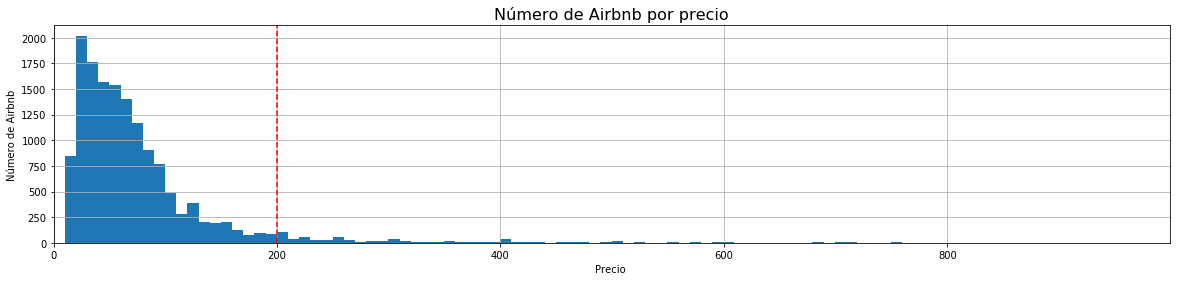

In [782]:
plt.figure(figsize=(20,4))
y.hist(bins=100, range=(0,max(y)))
plt.margins(x=0)
plt.axvline(200, color='red', linestyle='--')
plt.title("Número de Airbnb por precio", fontsize=16)
plt.xlabel("Precio ")
plt.ylabel("Número de Airbnb")
plt.show()

No parece ser un factor muy importante, aunque sí crece poco a poco. el Dato de las 33 es algo completamente aleatorio, es posible que solo haya un dato con 33 'Amenities'

En vista de este gráfico y debido a la baja frecuencia relativa de algunos precios, vamos a filtrar el dataset, y escogeremos las observaciones correspondientes a los airbnb con precios menores que 220.

In [783]:
data = pd.concat([y,data],axis=1)

In [784]:
datos = data.drop(data[data['Price']>220].index)
datos.shape

(14300, 41)

In [785]:
datos.head()

,Price,Host Since,Host Response Rate,Market,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,...,Amenities_8,Amenities_9,Amenities_10,Amenities_11,Features_0,Features_1,Features_2,Host Verifications_0,Host Verifications_1,Host Verifications_2
0,58.0,421.0,100.0,Austin,Apartment,Entire home/apt,2,1.0,1.0,1.0,...,-0.481565,0.242706,0.560399,0.102890,-0.441616,-0.630208,-0.066578,-0.619940,-0.101797,0.106469
1,70.0,150.0,100.0,Barcelona,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,0.329049,0.015574,0.887026,0.681351,0.531915,0.912232,0.267454,-0.541394,-0.128328,-0.093625
2,70.0,150.0,100.0,Barcelona,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,0.329049,0.015574,0.887026,0.681351,0.531915,0.912232,0.267454,-0.541394,-0.128328,-0.093625
4,149.0,451.0,99.0,Barcelona,Apartment,Entire home/apt,5,1.0,2.0,2.0,...,0.016091,0.235966,-0.080284,-0.076036,-0.717360,0.388629,-0.098217,0.218679,-0.313825,-0.301971
5,106.0,451.0,99.0,Barcelona,Apartment,Entire home/apt,6,1.0,2.0,3.0,...,-0.219592,0.381011,-0.162087,-0.117387,-0.717360,0.388629,-0.098217,0.218679,-0.313825,-0.301971


In [786]:
#Actualizamos los indices
datos = datos.reset_index(drop=True)

Hemos reducido unos 500 datos, y en general, los descriptivos de interés como el precio medio sigue siendo similar al anterior:

In [787]:
datos.describe()

,Price,Host Since,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,Cleaning Fee,Guests Included,Extra People,...,Amenities_8,Amenities_9,Amenities_10,Amenities_11,Features_0,Features_1,Features_2,Host Verifications_0,Host Verifications_1,Host Verifications_2
count,14283.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,...,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000,14300.000000
mean,63.710635,929.023986,94.852254,3.162657,1.235594,1.286154,1.953566,17.434685,1.554336,7.563427,...,-0.000409,0.004663,0.002369,-0.009514,0.000780,0.001542,-0.002481,0.000002,0.001517,0.000338
std,40.793619,589.130465,14.069038,1.899158,0.574646,0.795692,1.445786,23.562381,1.050071,12.075280,...,0.417174,0.404840,0.396086,0.379815,0.509256,0.475284,0.468852,0.552115,0.406380,0.357576
min,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.465131,-1.462668,-1.353077,-1.324062,-0.914326,-0.689545,-0.610753,-0.783187,-0.347093,-0.793154
25%,32.000000,449.750000,94.823461,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,-0.276703,-0.272490,-0.263538,-0.279751,-0.328365,-0.384494,-0.562877,-0.606504,-0.313825,-0.301971
50%,55.000000,840.000000,100.000000,2.000000,1.000000,1.000000,1.000000,10.000000,1.000000,0.000000,...,-0.004625,0.012706,0.000743,-0.056840,0.073205,-0.201356,-0.096672,0.218679,-0.116631,0.108515
75%,80.000000,1386.250000,100.000000,4.000000,1.000000,2.000000,2.000000,30.000000,2.000000,15.000000,...,0.267564,0.287844,0.277696,0.243377,0.462200,0.388629,0.268999,0.348983,0.004053,0.173323
max,220.000000,2882.000000,100.000000,16.000000,8.000000,10.000000,16.000000,662.000000,16.000000,500.000000,...,1.587135,1.533110,1.610236,1.610756,0.928753,0.914341,0.802330,1.218461,1.059353,1.271921


Hasta ahora no lo habíamos visto, pero hará falta tratamiento de missings en la variable objetivo:

In [788]:
datos.isna().sum()

Price                             17
Host Since                         0
Host Response Rate                 0
Market                             0
Property Type                      0
Room Type                          0
Accommodates                       0
Bathrooms                          0
Bedrooms                           0
Beds                               0
Bed Type                           0
Cleaning Fee                       0
Guests Included                    0
Extra People                       0
Minimum Nights                     0
Maximum Nights                     0
Availability 365                   0
Number of Reviews                  0
Review Scores Rating               0
Cancellation Policy                0
Calculated host listings count     0
Reviews per Month                  0
Geolocation                        0
Amenities_0                        0
Amenities_1                        0
Amenities_2                        0
Amenities_3                        0
A

Reemplazamos valores nulos por la media:

In [789]:
datos['Price']=datos['Price'].fillna(datos['Price'].mean())

### 5.1. Algunos gráficos de interés

En primer lugar, veamos los histogramas de las variables continuas para hacernos una idea de su distribución

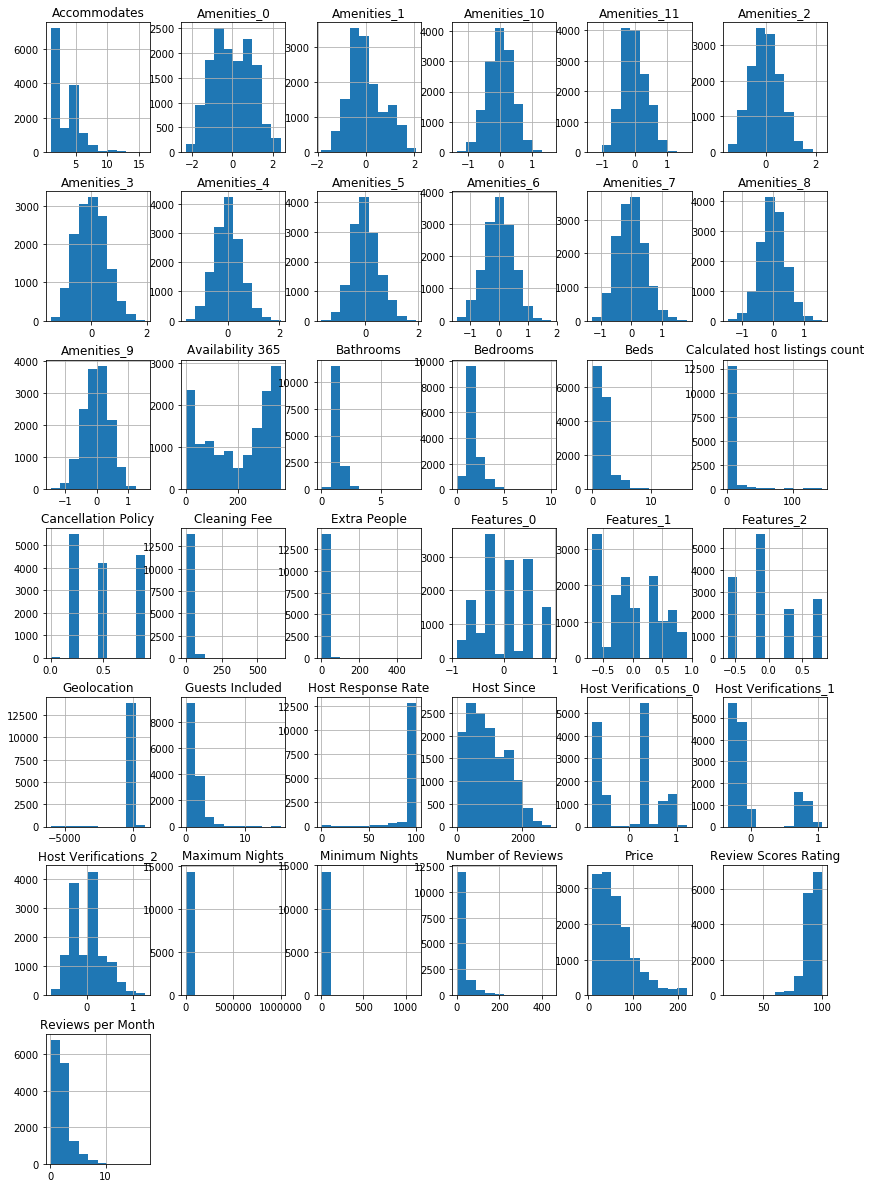

In [790]:
plt.rcParams['figure.figsize'] = (14,21)
datos.hist()
plt.show()

Tras el PCA realizado, vemos que las variables de Amenities se distribuyen más o menos de forma normal, aunque en general, todas las demás variables presentan ausencia de normalidad.

En cuanto a datos a tener en cuenta, vemos que la tasa de respuesta suele ser alta, lo más usual en accommodates suelen ser entre 1 y 5, suelen haber 1 ó 2 huéspedes incluidos (podríamos deducir que uno es el anfitrión), el anfitrión lleva de media unos 900 días ofreciendo alojamiento en la plataforma, y lo más usual es recibir una o dos reseñas al mes .

### 5.2. Gráficos variable Price

Vamos a estudiar gráficamente la variable 'Price' en función de otras variables, para hacernos una idea previa sobre qué atributos podrían influir en el precio

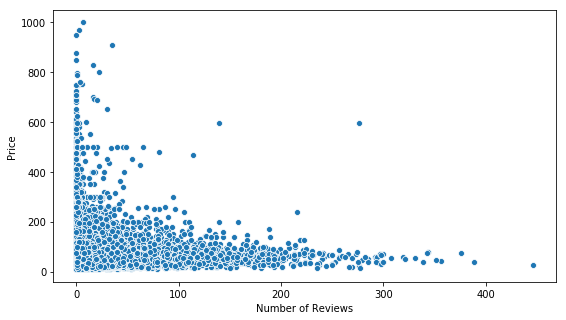

In [791]:
plt.rcParams['figure.figsize'] = (9,5)
sns.scatterplot(x=Datos['Number of Reviews'],y=Datos['Price'])

Podríamos deducir que el número de reseñas quizás influya en el precio, ya que, salvo algún posible outlier, vemos que los que presentan un número elevado de reseñas suelen tener un precio bajo. A su vez, los alojamientos con altos precios tienen pocas reseñas.

Tiene sentido: a los alojamientos con altos precios acceden menos personas, por lo tanto, menos gente que escribe reseñas, y a los alojamientos baratos accederán más personas y escribirán más reseñas (sobretodo si el servicio ha sido malo, ya que reseñarán para desaconsejarlo por mala calidad, y en general la calidad de un producto suele reflejarse en el precio)

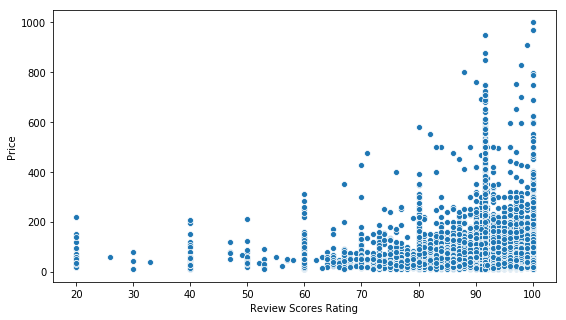

In [792]:
plt.rcParams['figure.figsize'] = (9,5)
sns.scatterplot(x=Datos['Review Scores Rating'],y=Datos['Price'])

De forma similar, en consecuencia a lo que acabamos de comentar, vemos que la puntuación que ofrecen las reseñas parece relacionarse con el precio. Los alojamientos con altos precios presentan altas puntuaciones en las reseñas, mientras que los que presentan baja puntuación en las reseñas suelen ser alojamientos baratos.

No obstante, claro que habrá alojamientos baratos con muy buenas reseñas, pero los que tienen reseñas malas, son baratos.

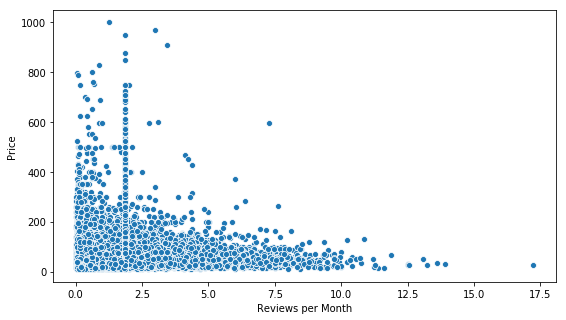

In [793]:
plt.rcParams['figure.figsize'] = (9,5)
sns.scatterplot(x=Datos['Reviews per Month'],y=Datos['Price'])

En este gráfico podemos deducir los mismos resultados que en el de Number of Reviews. Tal vez, en el posterior análisis de regresión, se deba prescindir de esta variable.

Los gráficos de la variable precio en función de las demás variables continuas no arrojaban resultados de interés.

Analicemos el precio medio en función las variables categóricas:

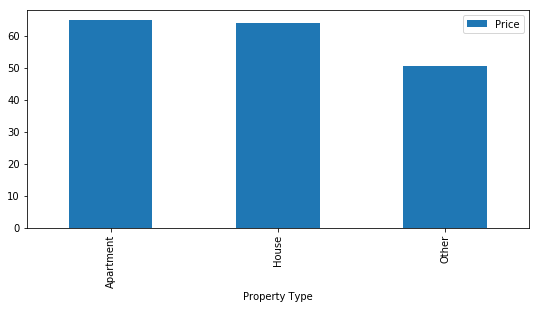

In [794]:
plt.rcParams['figure.figsize'] = (9,4)
pd.DataFrame(datos.groupby('Property Type')['Price'].mean().sort_values(ascending=False)).plot(kind='bar')

Podemos sospechar que no hay diferencias significativas sobre el precio entre alojarse en un apartamento y una casa. En cambio, si elegimos la otra opción el precio será inferior (tiene sentido)

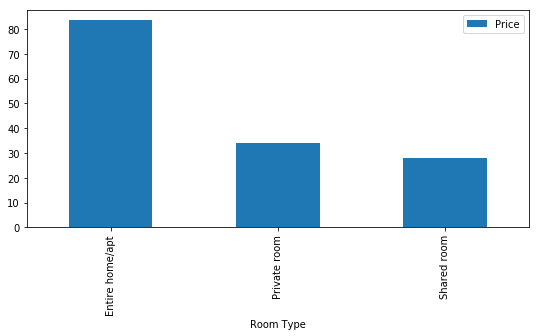

In [795]:
plt.rcParams['figure.figsize'] = (9,4)
pd.DataFrame(datos.groupby('Room Type')['Price'].mean().sort_values(ascending=False)).plot(kind='bar')

Era previsible imaginar que el precio se encarecerá si tenemos todo el inmueble a nuestra disposición. No obstante, curiosamente el precio entre una habitación privada y una compartida parecen ser algo similares.

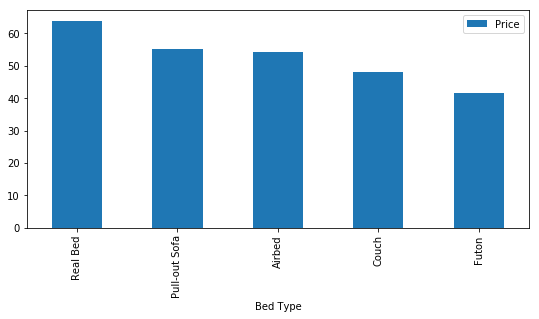

In [796]:
plt.rcParams['figure.figsize'] = (9,4)
pd.DataFrame(datos.groupby('Bed Type')['Price'].mean().sort_values(ascending=False)).plot(kind='bar')

Podríamos pensar que el precio medio va acorde al tipo de cama, aunque no parece haber diferencias excesivas.

Veamos el precio medio en función de las ciudades:

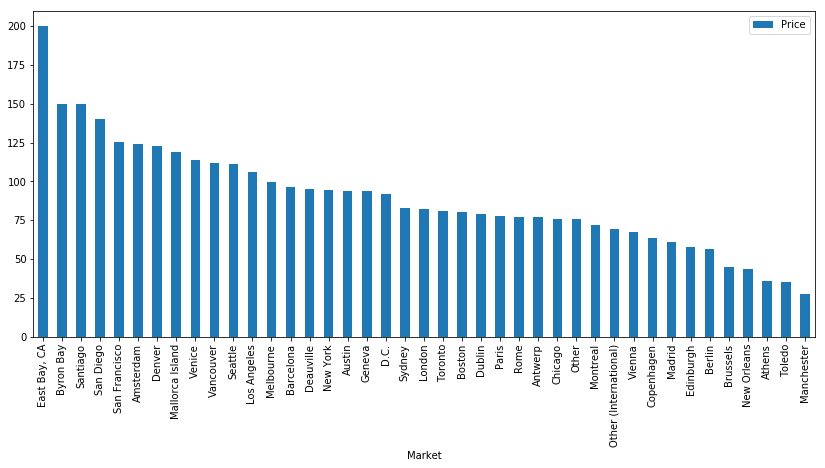

In [797]:
plt.rcParams['figure.figsize'] = (14,6)
pd.DataFrame(datos.groupby('Market')['Price'].mean().sort_values(ascending=False)).plot(kind='bar')

# 6. Encoding y escalado de variables

### 6.1. Encoding

Respecto a las variables categóricas, haremos un encoding para finalmente poder trabajar con todas las variables juntas.

Tanto Property Type, como Room Type y Bed Type las codificamos de forma binaria con OneHotEncoder.

La variable Market la codificamos mediante CatBoostEncoder, ya que contiene muchos valores y cada uno tendrá un peso distinto

In [799]:
ohe = OneHotEncoder()
oh_array = ohe.fit_transform(datos['Property Type'].values.reshape(-1, 1)).toarray()
oh_df = pd.DataFrame(oh_array,columns=['Apartment','House','Other'])
datos = pd.concat([datos,oh_df],axis=1)
datos = datos.drop(columns='Property Type')

In [800]:
ohe = OneHotEncoder()
oh_array = ohe.fit_transform(datos['Room Type'].values.reshape(-1, 1)).toarray()
oh_df = pd.DataFrame(oh_array,columns=['Entire home/apt','Private room','Shared room'])
datos = pd.concat([datos,oh_df],axis=1)
datos = datos.drop(columns='Room Type')

In [801]:
ohe = OneHotEncoder()
oh_array = ohe.fit_transform(datos['Bed Type'].values.reshape(-1, 1)).toarray()
oh_df = pd.DataFrame(oh_array,columns=['Airbed','Couch','Futon','Pull-out Sofa','Real Bed'])
datos = pd.concat([datos,oh_df],axis=1)
datos = datos.drop(columns='Bed Type')

In [802]:
cbe = ce.CatBoostEncoder(cols=['Market'])
datos['Market_CBE'] = cbe.fit_transform(datos['Market'],datos.Price)
datos = datos.drop(columns='Market')

In [803]:
datos.head()

,Price,Host Since,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,Cleaning Fee,Guests Included,Extra People,...,Other,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Market_CBE
0,58.0,421.0,100.0,2,1.0,1.0,1.0,0.0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,63.710635
1,70.0,150.0,100.0,4,1.0,1.0,1.0,40.0,2,44,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,63.710635
2,70.0,150.0,100.0,4,1.0,1.0,1.0,60.0,2,42,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,66.855318
3,149.0,451.0,99.0,5,1.0,2.0,2.0,55.0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67.903545
4,106.0,451.0,99.0,6,1.0,2.0,3.0,0.0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,88.177659


Buscando reducir más el número de variables, realizamos un gráfico de correlación y eliminamos las variables con alta correlación

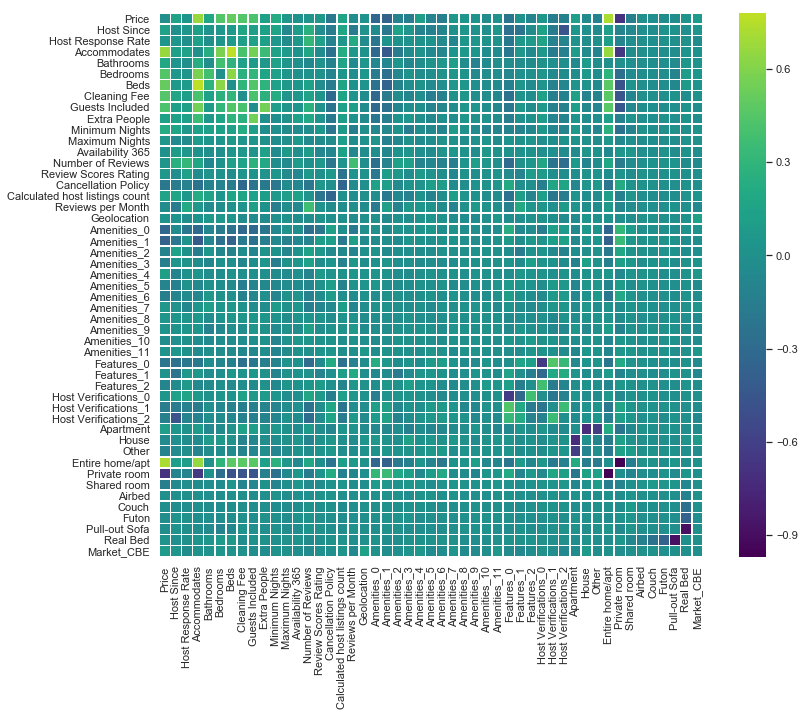

'Gráfico de correlación usando coeficiente de spearman'

In [806]:
funciones_auxiliares.get_corr_matrix(dataset = datos, metodo='spearman', size_figure=[14,12])

In [807]:
datos = datos.drop(columns=['Accommodates','Entire home/apt','Pull-out Sofa'])

In [808]:
datos.head()

,Price,Host Since,Host Response Rate,Bathrooms,Bedrooms,Beds,Cleaning Fee,Guests Included,Extra People,Minimum Nights,...,Apartment,House,Other,Private room,Shared room,Airbed,Couch,Futon,Real Bed,Market_CBE
0,58.0,421.0,100.0,1.0,1.0,1.0,0.0,1,0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,63.710635
1,70.0,150.0,100.0,1.0,1.0,1.0,40.0,2,44,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,63.710635
2,70.0,150.0,100.0,1.0,1.0,1.0,60.0,2,42,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,66.855318
3,149.0,451.0,99.0,1.0,2.0,2.0,55.0,1,0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67.903545
4,106.0,451.0,99.0,1.0,2.0,3.0,0.0,1,0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,88.177659


### 6.2. Conjuntos Train y Test y escalado de variables

In [810]:
X = datos.iloc[:,1:46]
Y = datos.iloc[:,0]

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((11440, 45), (2860, 45))

In [811]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model_scaled = scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# **Modelos de Regresión**